## 0. Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import torch
from torchvision import datasets, transforms

from model import Encoder, Decoder, ClassifModel, FinalModel
from run import ModelRun
from visualization import plot_confusion_matrix, plot_decoded_pics

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import warnings
warnings.filterwarnings("ignore")

seed = 128
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

# Check CUDA
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.is_available()

True

---
## 1. Load and prepare the data

In [2]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
valid_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)
train_dataset, valid_dataset

Files already downloaded and verified
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

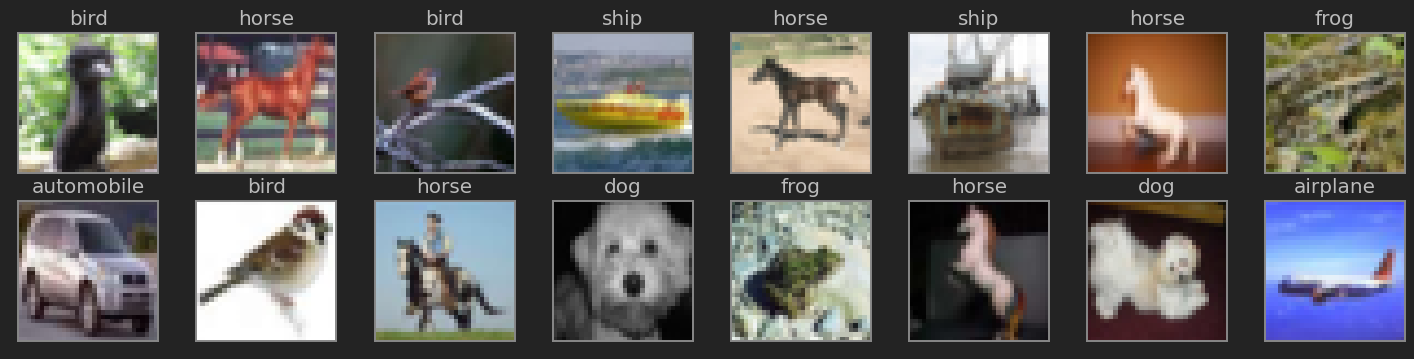

In [3]:
figure = plt.figure(figsize=(18, 4))
cols, rows = 8, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(train_dataset.classes[label])
    plt.xticks([]), plt.yticks([])
    plt.imshow(np.transpose(img, axes=(1, 2, 0)), cmap='Greys')
plt.show()

---
## 2. Load and run the autoencoder model with different hidden state size

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 32, 28, 28]           9,248
       BatchNorm2d-3           [-1, 32, 28, 28]              64
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 26, 26]          18,496
            Conv2d-6           [-1, 64, 24, 24]          36,928
       BatchNorm2d-7           [-1, 64, 24, 24]             128
              ReLU-8           [-1, 64, 24, 24]               0
            Conv2d-9          [-1, 128, 22, 22]          73,856
           Conv2d-10          [-1, 128, 20, 20]         147,584
      BatchNorm2d-11          [-1, 128, 20, 20]             256
             ReLU-12          [-1, 128, 20, 20]               0
          Flatten-13                [-1, 51200]               0
             ReLU-14                [-1

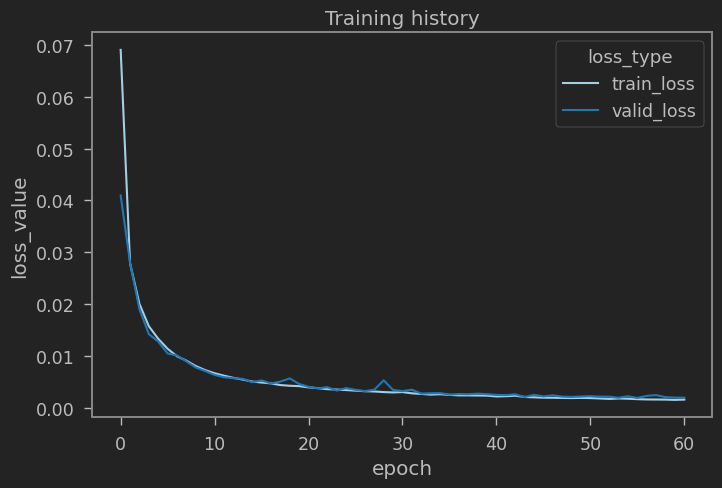

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 32, 28, 28]           9,248
       BatchNorm2d-3           [-1, 32, 28, 28]              64
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 26, 26]          18,496
            Conv2d-6           [-1, 64, 24, 24]          36,928
       BatchNorm2d-7           [-1, 64, 24, 24]             128
              ReLU-8           [-1, 64, 24, 24]               0
            Conv2d-9          [-1, 128, 22, 22]          73,856
           Conv2d-10          [-1, 128, 20, 20]         147,584
      BatchNorm2d-11          [-1, 128, 20, 20]             256
             ReLU-12          [-1, 128, 20, 20]               0
          Flatten-13                [-1, 51200]               0
             ReLU-14                [-1

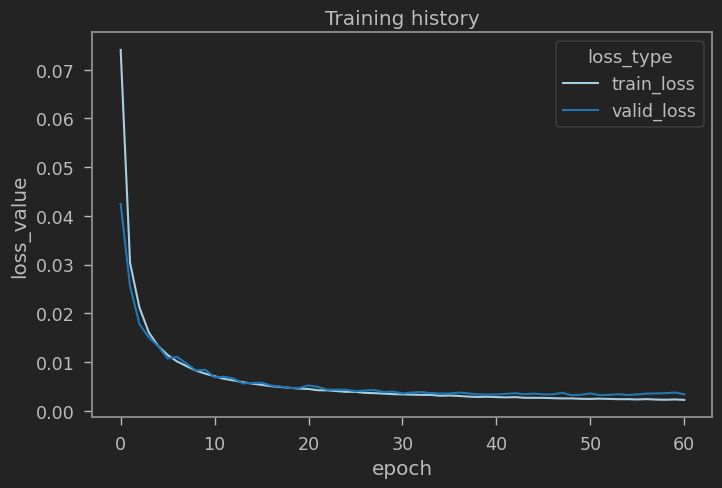

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 32, 28, 28]           9,248
       BatchNorm2d-3           [-1, 32, 28, 28]              64
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 26, 26]          18,496
            Conv2d-6           [-1, 64, 24, 24]          36,928
       BatchNorm2d-7           [-1, 64, 24, 24]             128
              ReLU-8           [-1, 64, 24, 24]               0
            Conv2d-9          [-1, 128, 22, 22]          73,856
           Conv2d-10          [-1, 128, 20, 20]         147,584
      BatchNorm2d-11          [-1, 128, 20, 20]             256
             ReLU-12          [-1, 128, 20, 20]               0
          Flatten-13                [-1, 51200]               0
             ReLU-14                [-1

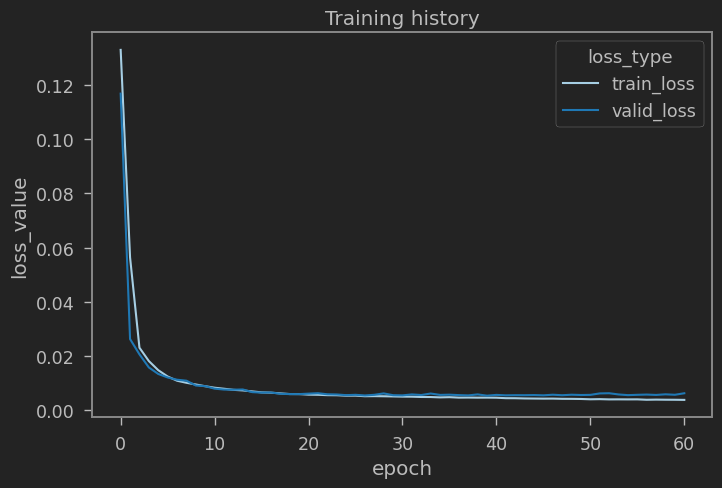

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 32, 28, 28]           9,248
       BatchNorm2d-3           [-1, 32, 28, 28]              64
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 26, 26]          18,496
            Conv2d-6           [-1, 64, 24, 24]          36,928
       BatchNorm2d-7           [-1, 64, 24, 24]             128
              ReLU-8           [-1, 64, 24, 24]               0
            Conv2d-9          [-1, 128, 22, 22]          73,856
           Conv2d-10          [-1, 128, 20, 20]         147,584
      BatchNorm2d-11          [-1, 128, 20, 20]             256
             ReLU-12          [-1, 128, 20, 20]               0
          Flatten-13                [-1, 51200]               0
             ReLU-14                [-1

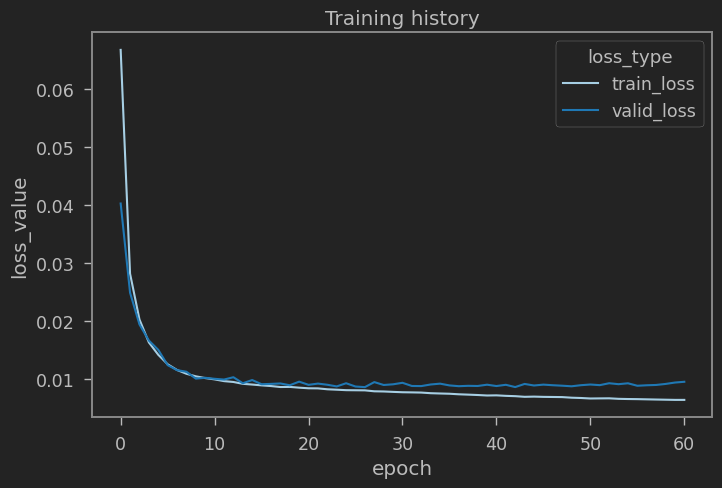

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 32, 28, 28]           9,248
       BatchNorm2d-3           [-1, 32, 28, 28]              64
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 26, 26]          18,496
            Conv2d-6           [-1, 64, 24, 24]          36,928
       BatchNorm2d-7           [-1, 64, 24, 24]             128
              ReLU-8           [-1, 64, 24, 24]               0
            Conv2d-9          [-1, 128, 22, 22]          73,856
           Conv2d-10          [-1, 128, 20, 20]         147,584
      BatchNorm2d-11          [-1, 128, 20, 20]             256
             ReLU-12          [-1, 128, 20, 20]               0
          Flatten-13                [-1, 51200]               0
             ReLU-14                [-1

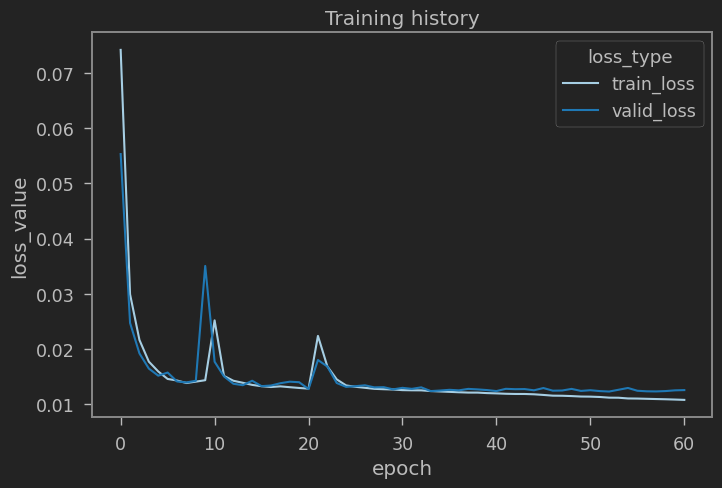

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 32, 28, 28]           9,248
       BatchNorm2d-3           [-1, 32, 28, 28]              64
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 26, 26]          18,496
            Conv2d-6           [-1, 64, 24, 24]          36,928
       BatchNorm2d-7           [-1, 64, 24, 24]             128
              ReLU-8           [-1, 64, 24, 24]               0
            Conv2d-9          [-1, 128, 22, 22]          73,856
           Conv2d-10          [-1, 128, 20, 20]         147,584
      BatchNorm2d-11          [-1, 128, 20, 20]             256
             ReLU-12          [-1, 128, 20, 20]               0
          Flatten-13                [-1, 51200]               0
             ReLU-14                [-1

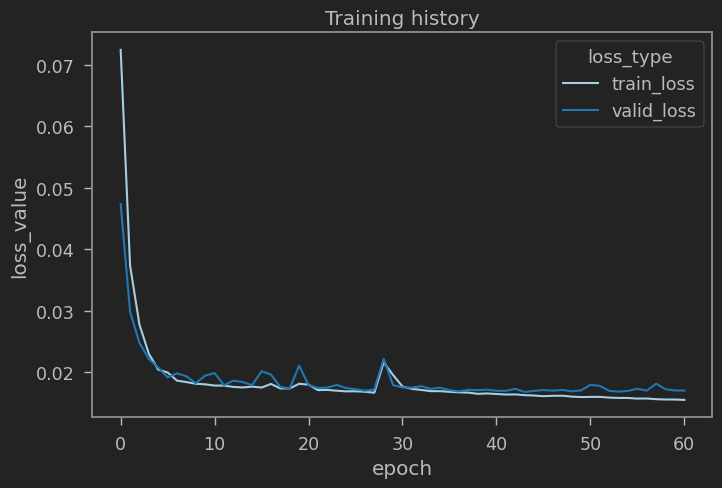

CPU times: user 6h 56min 47s, sys: 2min 57s, total: 6h 59min 45s
Wall time: 6h 58min 49s


In [4]:
%%time
hidden_dimensions = [512, 256, 128, 64, 32, 16]

for HIDDEN_DIMENSION in hidden_dimensions:
    model = FinalModel(Encoder(HIDDEN_DIMENSION), Decoder(HIDDEN_DIMENSION)).to(device)
    autoencoder = ModelRun(model, device, show_model=True)
    autoencoder.model_train(train_loader, valid_loader, epochs=61, file_suffix=f'_{HIDDEN_DIMENSION}')

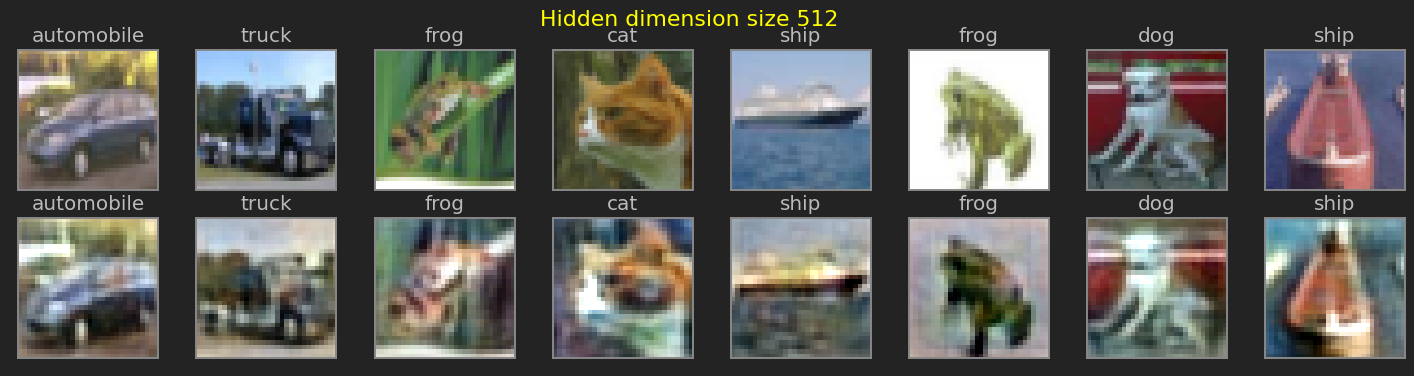

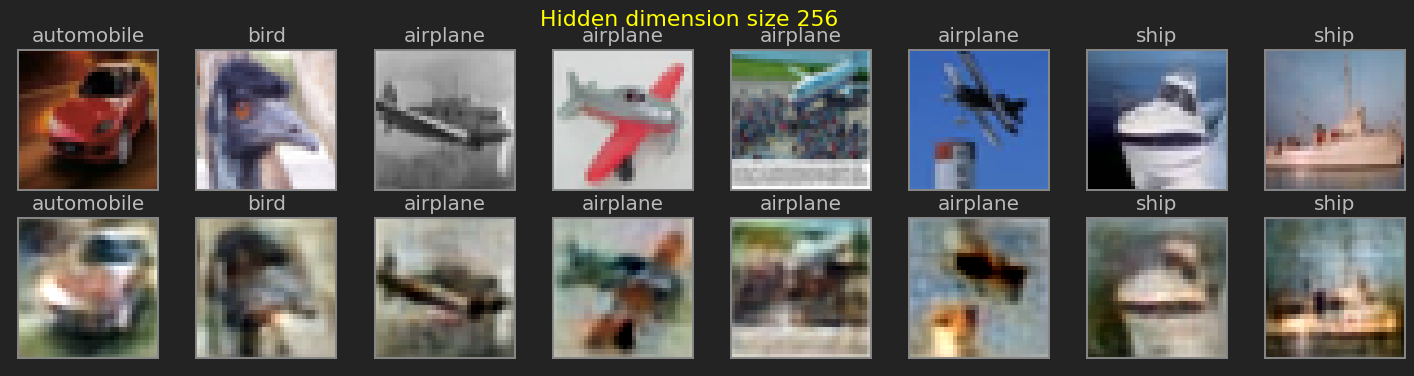

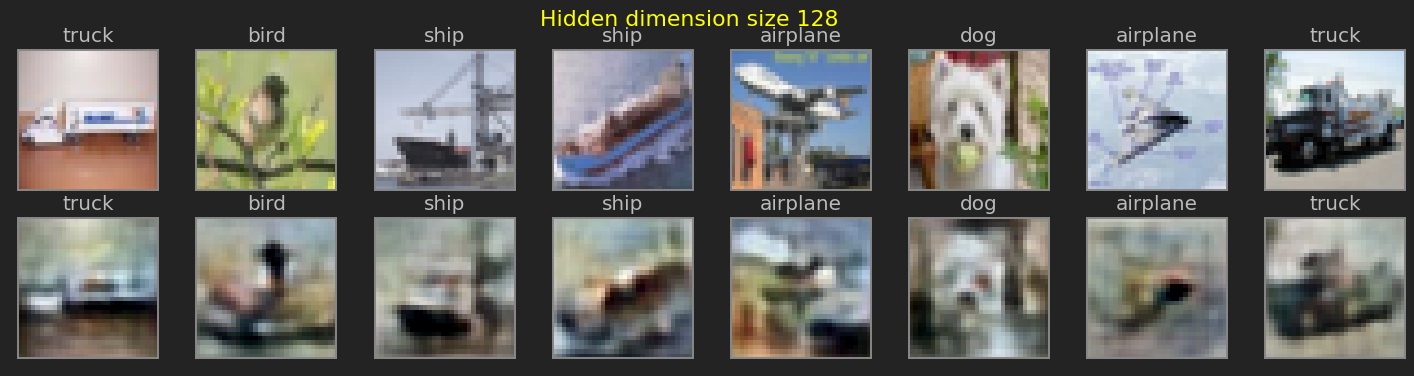

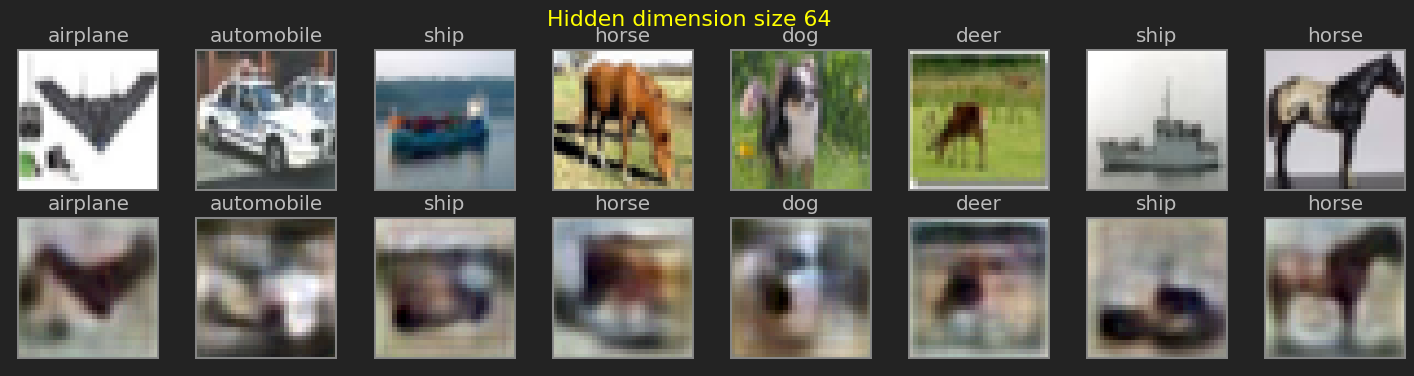

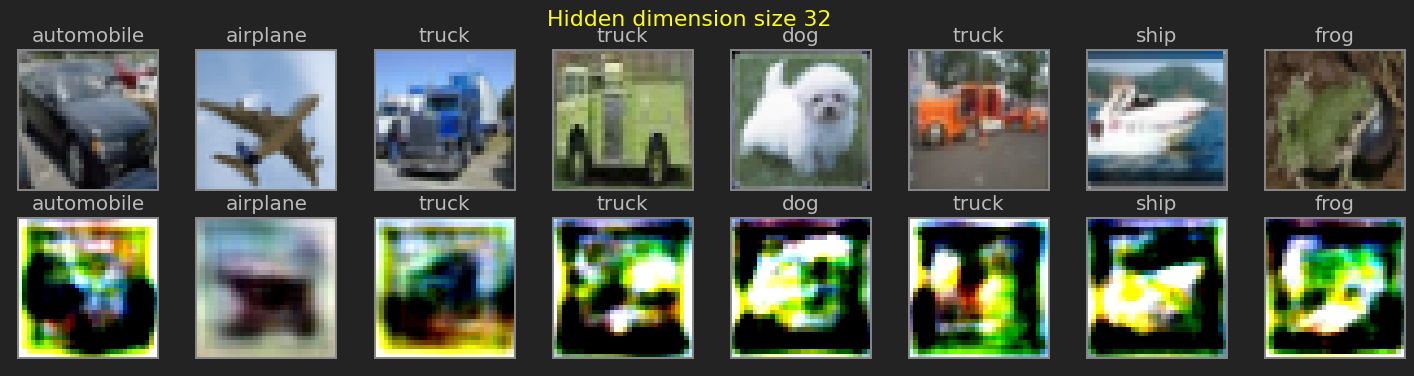

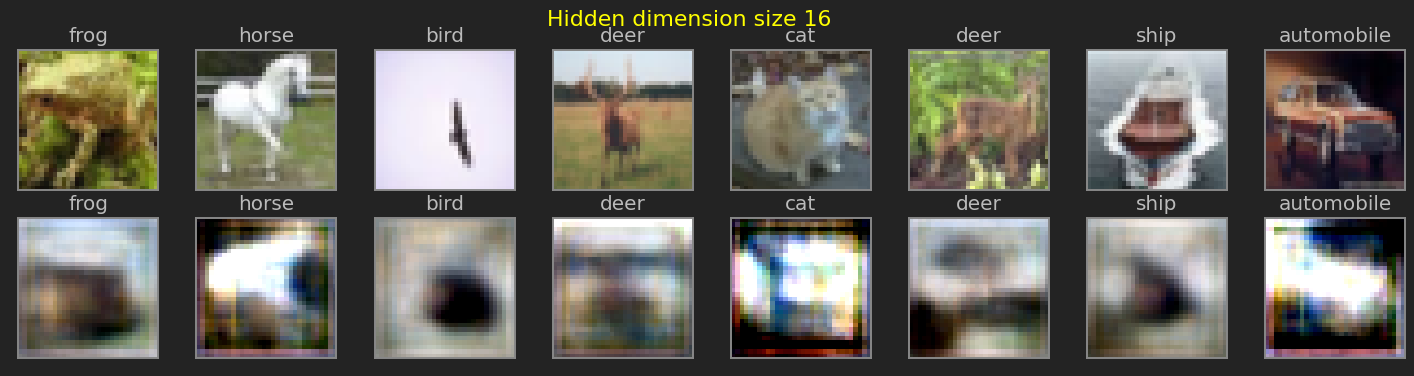

In [7]:
device = torch.device('cpu')
hidden_dimensions = [512, 256, 128, 64, 32, 16]
for HIDDEN_DIMENSION in hidden_dimensions:
    model = FinalModel(Encoder(HIDDEN_DIMENSION), Decoder(HIDDEN_DIMENSION)).to(device)
    model.load_state_dict(torch.load(f'./Models/autoencoder_model_hidden_dim_{HIDDEN_DIMENSION}.pth', map_location=device))
    plot_decoded_pics(valid_dataset, model, chosen_dim=HIDDEN_DIMENSION)

---
## 3.  Load and train classification model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 32, 28, 28]           9,248
       BatchNorm2d-3           [-1, 32, 28, 28]              64
              ReLU-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 26, 26]          18,496
            Conv2d-6           [-1, 64, 24, 24]          36,928
       BatchNorm2d-7           [-1, 64, 24, 24]             128
              ReLU-8           [-1, 64, 24, 24]               0
            Conv2d-9          [-1, 128, 22, 22]          73,856
           Conv2d-10          [-1, 128, 20, 20]         147,584
      BatchNorm2d-11          [-1, 128, 20, 20]             256
             ReLU-12          [-1, 128, 20, 20]               0
          Flatten-13                [-1, 51200]               0
             ReLU-14                [-1

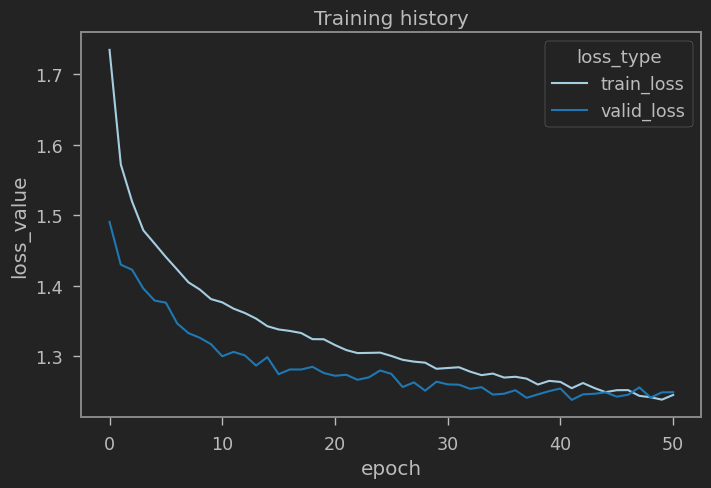

In [28]:
HIDDEN_DIMENSION = 512
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = FinalModel(Encoder(HIDDEN_DIMENSION), Decoder(HIDDEN_DIMENSION)).to(device)
model.load_state_dict(torch.load(f'./Models/autoencoder_model_hidden_dim_{HIDDEN_DIMENSION}.pth', map_location=device))

pretrained_encoder = model.enc
for param in pretrained_encoder.parameters():
    param.requires_grad = False

model = FinalModel(pretrained_encoder, ClassifModel(HIDDEN_DIMENSION)).to(device)
test = ModelRun(model, device)
test.model_train(train_loader, valid_loader, epochs=51, classification=True, file_suffix=f'_{HIDDEN_DIMENSION}')

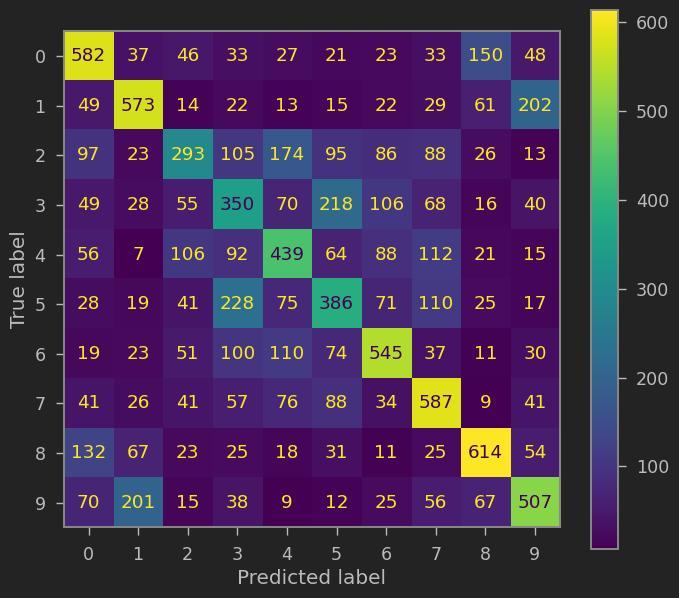

In [29]:
device = torch.device('cpu')
model = FinalModel(Encoder(HIDDEN_DIMENSION), ClassifModel(HIDDEN_DIMENSION)).to(device)
model.load_state_dict(torch.load(f'./Models/classification_model_hidden_dim_{HIDDEN_DIMENSION}.pth', map_location=device))

plot_confusion_matrix(valid_dataset, model)